## Import libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


## Load the Dataset

In [5]:
apple_data = pd.read_csv('AAPL_data.csv')
google_data = pd.read_csv('GOOG_data.csv')
microsoft_data = pd.read_csv('MSFT_data.csv')
amazon_data = pd.read_csv('AMZN_data.csv')

#concatenate the apple, google, microsoft, amazon data
df = pd.concat([apple_data, google_data, microsoft_data, amazon_data], axis=0)

#shuffle the dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,date,open,high,low,close,volume,Name
0,2015-08-27,112.25,113.24,110.02,112.92,84616056,AAPL
1,2017-08-21,910.00,913.00,903.40,906.66,943441,GOOG
2,2014-12-12,110.46,111.87,109.58,109.73,56028138,AAPL
3,2016-09-13,768.77,769.89,759.05,761.01,3117224,AMZN
4,2017-05-04,69.03,69.08,68.64,68.81,21749409,MSFT


## Data Preprocessing and Cleaning

In [6]:
#summary stats of apple data
apple_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [7]:
#summary stats of amazon data
amazon_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


In [8]:
#summary stats of google data
google_data.describe()

,open,high,low,close,volume
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02
mean,725.364168,730.822248,719.456843,725.403353,1.808414e+06
std,165.996590,166.847404,165.526487,166.420529,9.479685e+05
min,494.650000,495.976000,487.560000,492.550000,7.932000e+03
25%,565.113000,570.380000,559.055000,564.785000,1.261927e+06
50%,722.710000,727.000000,716.430000,720.640000,1.576830e+06
75%,822.035000,826.185000,818.725000,823.330000,2.052652e+06
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07


In [9]:
#summary stats of microsoft data
microsoft_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [11]:
#check missing values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

## Exploratory Data Analysis

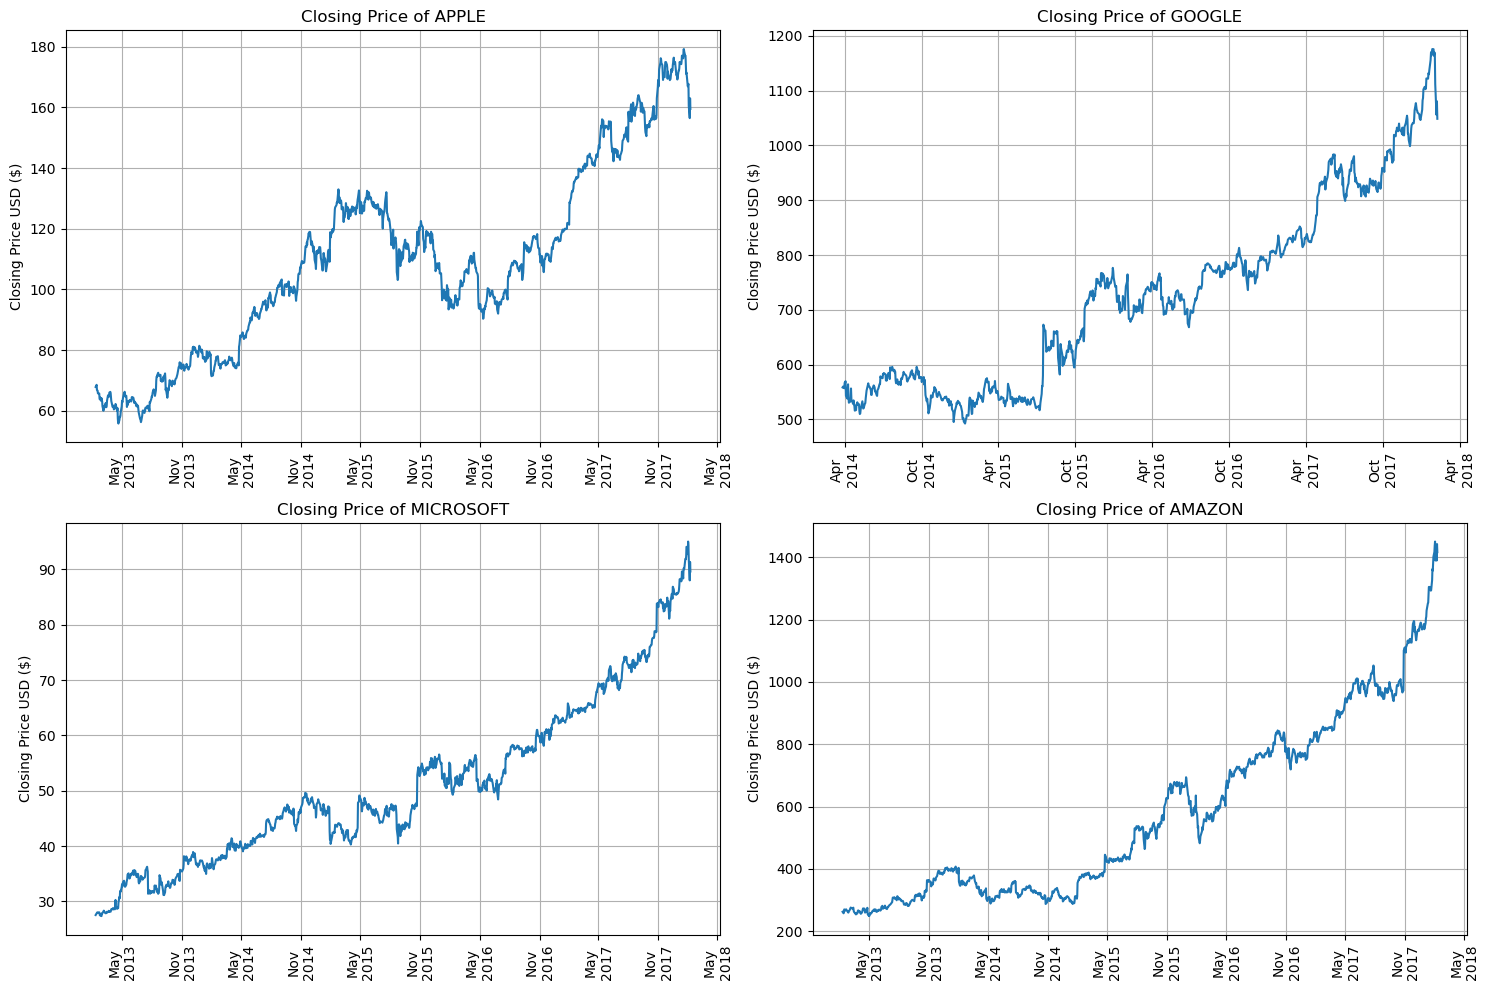

In [36]:

# Define the company list and company names
company_list = [apple_data, google_data, microsoft_data, amazon_data]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Convert the date column to datetime format
for company in company_list:
    company['date'] = pd.to_datetime(company['date'])

# Set up the figure and adjust subplot layout
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterate over company_list and create subplots
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company['close'])
    plt.ylabel('Closing Price USD ($)')
    plt.title(f"Closing Price of {company_name[i-1]}")

    # Format x-axis date labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format as "Month\nYear"
    plt.xticks(rotation=90, ha='center')  # Rotate labels vertically and center them
    
    plt.grid(True)
    
plt.tight_layout()
plt.show()


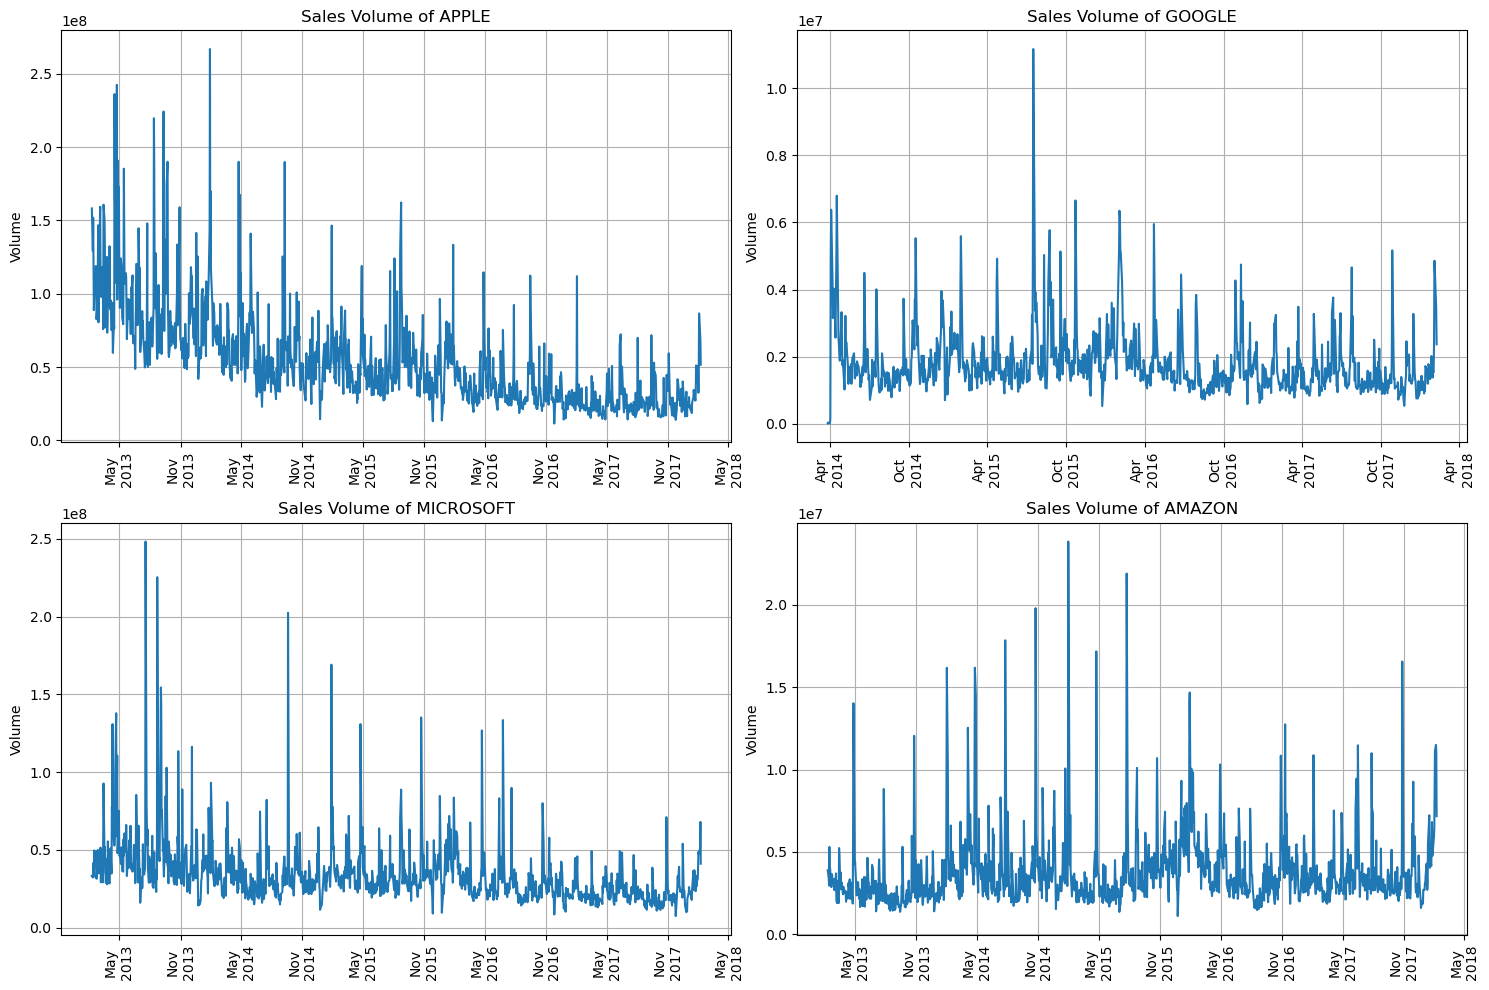

In [34]:

# Set up the figure and adjust subplot layout
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)


# Iterate over company_list and create subplots
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company['volume'])
    plt.ylabel('Volume')
    plt.title(f"Sales Volume of {company_name[i-1]}")

    # Format x-axis date labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format as "Month\nYear"
    plt.xticks(rotation=90, ha='center')  # Rotate labels vertically and center them
    
    plt.grid(True)
    
plt.tight_layout()
plt.show()


### Preprocess the Amazon Data Only

In [48]:
# Select close feature only from the daatset
data = amazon_data['close'].values.reshape(-1, 1)

#perform data standardization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [47]:
# split the data into training and testing sets

train_size = int(len(scaled_data)*0.8)
# 80% data in training sets & 20% test sets
train_data = scaled_data[:train_size]

### This data goes as a input in the RNN model


In [87]:

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

#I chose to have a sequence of 30
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01140805, 0.00746678, 0.0087057 , 0.01766085, 0.01746961,
       0.01401892, 0.01789367, 0.01511649, 0.01472569, 0.01429332,
       0.00967855, 0.00925449, 0.01248898, 0.0133371 , 0.01455939,
       0.02068748, 0.02274957, 0.02125289, 0.02132772, 0.02158549,
       0.01913259, 0.0215356 , 0.02234214, 0.01455939, 0.01129995,
       0.0080322 , 0.00680159, 0.00752332, 0.00429049, 0.00791579])]
[0.006477308632531209]

[array([0.01140805, 0.00746678, 0.0087057 , 0.01766085, 0.01746961,
       0.01401892, 0.01789367, 0.01511649, 0.01472569, 0.01429332,
       0.00967855, 0.00925449, 0.01248898, 0.0133371 , 0.01455939,
       0.02068748, 0.02274957, 0.02125289, 0.02132772, 0.02158549,
       0.01913259, 0.0215356 , 0.02234214, 0.01455939, 0.01129995,
       0.0080322 , 0.00680159, 0.00752332, 0.00429049, 0.00791579]), array([0.00746678, 0.0087057 , 0.01766085, 0.01746961, 0.01401892,
       0.01789367, 0.01511649, 0.01472569, 0.01429332, 0.00967855,
       0.00925449, 0.01248898, 0

Build the LSTM Model

In [74]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(x_train.shape[1],1),
               return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(25))
model.add(Dense(1))
#compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

#Train the RNN model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
31/31 [==============================] - 2s 23ms/step - loss: 0.0130
Epoch 2/10
31/31 [==============================] - 1s 22ms/step - loss: 8.3510e-04
Epoch 3/10
31/31 [==============================] - 1s 23ms/step - loss: 3.4272e-04
Epoch 4/10
31/31 [==============================] - 1s 22ms/step - loss: 2.9413e-04
Epoch 5/10
31/31 [==============================] - 1s 22ms/step - loss: 2.7990e-04
Epoch 6/10
31/31 [==============================] - 1s 22ms/step - loss: 2.6890e-04
Epoch 7/10
31/31 [==============================] - 1s 22ms/step - loss: 2.8188e-04
Epoch 8/10
31/31 [==============================] - 1s 22ms/step - loss: 2.5070e-04
Epoch 9/10
31/31 [==============================] - 1s 22ms/step - loss: 2.4963e-04
Epoch 10/10
31/31 [==============================] - 1s 22ms/step - loss: 2.5389e-04


In [77]:
test_data = scaled_data[train_size-30:,:]
# Create the data sets x_test and y_test
x_test = []
y_test = data[train_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("The RMSE error for this amazon dataset :","{:.2f}".format(rmse))

8/8 [==============================] - 0s 8ms/step
The RMSE error for this amazon dataset : 35.37


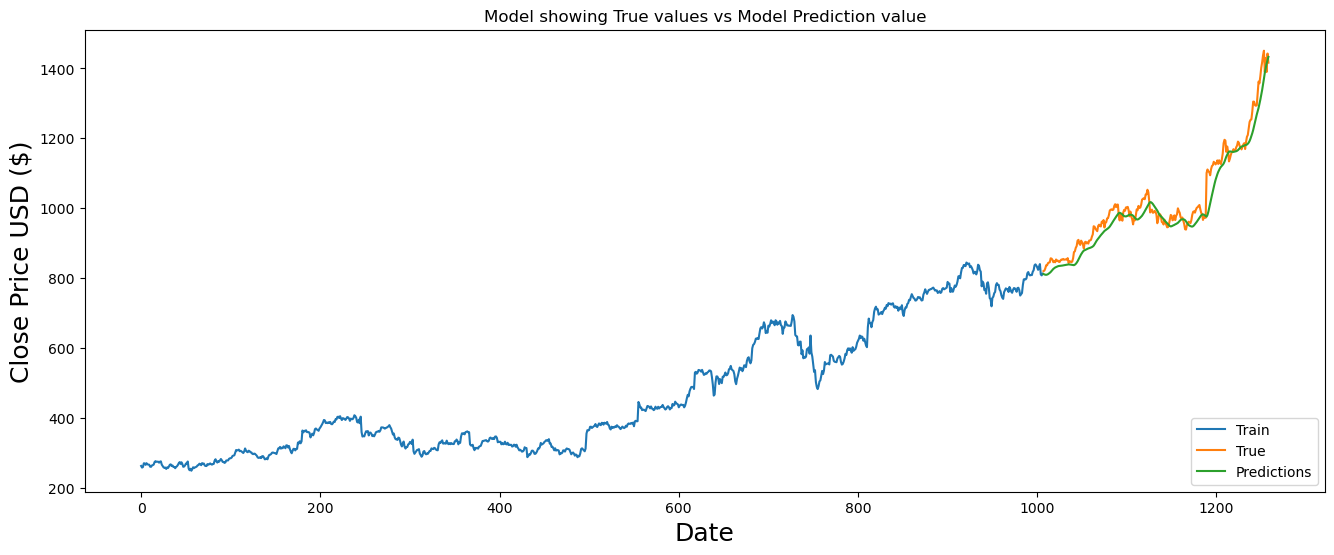

In [85]:
# Plot the data

train = amazon_data[:train_size]
test = amazon_data[train_size:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model showing True values vs Model Prediction value')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(test[['close', 'Predictions']])
plt.legend(['Train', 'True', 'Predictions'], loc='lower right')
plt.show()

Forecast future stock price from the RNN model

In [86]:
test[['date','close','Predictions']]

,date,close,Predictions
1007,2017-02-08,819.71,811.404358
1008,2017-02-09,821.36,810.283630
1009,2017-02-10,827.46,809.441956
1010,2017-02-13,836.53,809.181763
1011,2017-02-14,836.39,809.820740
...,...,...,...
1254,2018-02-01,1390.00,1388.062500
1255,2018-02-02,1429.95,1401.348633
1256,2018-02-05,1390.00,1414.199951
1257,2018-02-06,1442.84,1423.328979
